# Run Exercise 1.1 with nearest neighbor algorithm with FLANN to determine speedup and accuracy differences

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from pyflann import *

from utils import read_data

### Grab data

In [2]:
train_images = read_data.get_mnist_data(read_data.MNIST_TRAIN_IMAGES_URL).astype('int32')
train_labels = read_data.get_mnist_data(read_data.MNIST_TRAIN_LABELS_URL)
test_images = read_data.get_mnist_data(read_data.MNIST_TEST_IMAGES_URL).astype('int32')
test_labels = read_data.get_mnist_data(read_data.MNIST_TEST_LABELS_URL)

### Pull random sample from test and display label

7


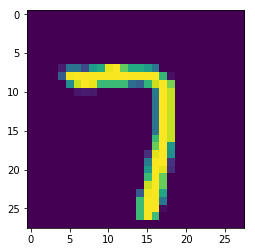

In [3]:
sample_test = np.random.randint(0,1000)
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Shuffle all rows

In [4]:
seed = np.random.randint(100)
# Get a random seed, but shuffle all matrices the same way
for i in range(test_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(test_images[i])
for i in range(train_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(train_images[i])

7


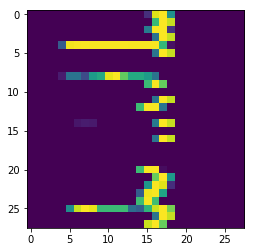

In [5]:
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Sampling
pyflann is so must faster, running the entire dataset completes in a reasonable amount of time

In [6]:
#test_samples = 1000 #Size of test data
#test_labels = test_labels[:test_samples]
#test_images = test_images[:test_samples,:]

### Flatten to 2d array for flann

In [7]:
test_images = test_images.reshape(test_images.shape[0],-1)
train_images = train_images.reshape(train_images.shape[0],-1)

### Run NN from pyflann

In [8]:
t0 = time.time()
flann = FLANN()
result, dists = flann.nn(train_images, test_images) 
t1 =time.time()

### Compute error by checking if matching training label from result matches the test label

In [9]:
errors = 1 - np.mean(np.equal(train_labels[result], test_labels))

In [10]:
print('error:' + str(errors))
print('Time taken:' + str(t1-t0))

error:0.0504
Time taken:0.4280872344970703


### Notes
FLANN runs greater than an order of magnitude faster than manual NN, as the user manual suggests (9 seconds vs .4 seconds)
Error changes on each run. Is FLANN deterministic?